## Fashion image classification

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  

In this programming assignment, we will do the following.
- Build a classifier for the Fashion-MNIST dataset that achieves over 85% accuracy on the test set.
- Use only classifiers that are used in the Chapter 3 of the textbook.
- Conduct error analysis following the textbook.

The grading rubrics are in the following text and coding blocks. Points for coding blocks we need to fill in are shown right before these blocks.

In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Load the data.

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Reshape the data.

In [3]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [4]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [5]:
y_train.shape, y_test.shape

((60000,), (10000,))

### Labels
Each training and test example is assigned to one of the following labels:

Label	Description
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [6]:
def plot_item(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

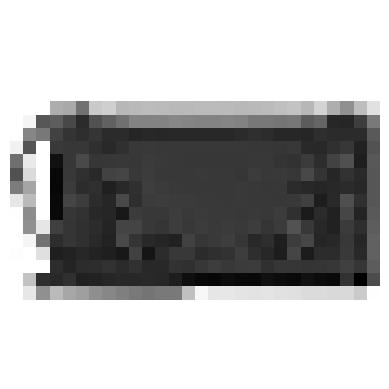

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_item = X_train[36001]
some_item_image = some_item.reshape(28, 28)
plt.imshow(some_item_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

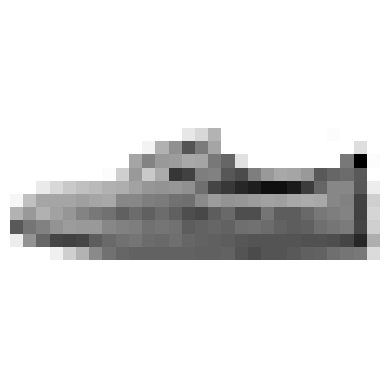

In [8]:
plot_item(X_train[40000])

### Function Parameters:

  **instances:** The collection of images to be plotted, expected to be in the form of flattened arrays.

  **images_per_row:** Optional parameter specifying how many images to display per row in the grid. Defaults to 10.

  **options**: Arbitrary keyword arguments that are passed to the plt.imshow() function, allowing for customization of the plot (e.g., colormap).

### Body of the Function
  **Initialize Image Size and Calculate Rows:**

  **size = 28**: Sets the height and width of each image, assuming each image is a square (28x28 pixels is common for datasets like MNIST).

  **images_per_row = min(len(instances), images_per_row)**: Adjusts images_per_row to be the minimum of the total number of instances or the specified images_per_row parameter, to handle cases where there are fewer instances than the default or specified number of images per row.

  **n_rows = (len(instances) - 1) // images_per_row + 1**: Calculates how many rows are needed to display all instances.

  **Reshape and Organize Images:**

  **images = [instance.reshape(size,size) for instance in instances]**: Converts each flattened instance back into a 2D array (28x28).
  An extra step adds empty images (np.zeros(...)) to fill the space if the number of instances doesn't exactly fill the grid. This ensures the grid is complete and symmetric.

  **Create and Concatenate Rows:**

  The loop iterates through each row, concatenating images horizontally (axis=1) to form rows, and then these rows are concatenated vertically (axis=0) to form the complete grid.

  **Plotting:**

  plt.imshow(image, cmap = matplotlib.cm.binary, **options): Uses Matplotlib's imshow function to display the grid of images. The colormap is set to binary (black and white), which is suitable for grayscale images.
  plt.axis("off"): Hides the axes for a cleaner look.

In [9]:
def plot_items(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Plot items from each of all the categories.

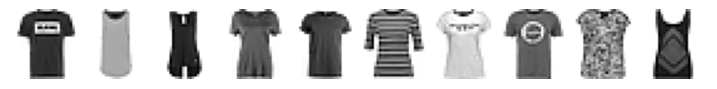

In [10]:
plt.figure(figsize=(9,9))
X_0 = X_train[(y_train == 0)] # y_train contains class labels for the training instances, this operation selects all instances of class 0 - T shirt/top.
example_images = X_0[:10]# assigning first 10 images
plot_items(example_images, images_per_row=10)

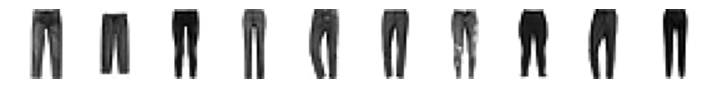

In [11]:
plt.figure(figsize=(9,9))
X_1 = X_train[(y_train == 1)] # selecting trousers
example_images = X_1[:10] # assining first 10 images
plot_items(example_images, images_per_row=10)

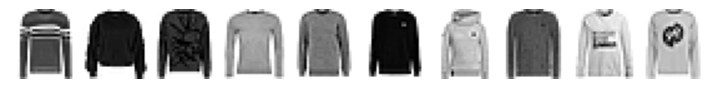

In [12]:
plt.figure(figsize=(9,9))
X_2 = X_train[(y_train == 2)] #selecting pull overs
example_images = X_2[:10]
plot_items(example_images, images_per_row=10)

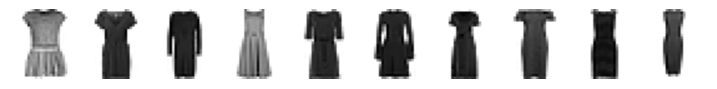

In [13]:
plt.figure(figsize=(9,9))
X_3 = X_train[(y_train == 3)] # Dress
example_images = X_3[:10]
plot_items(example_images, images_per_row=10)

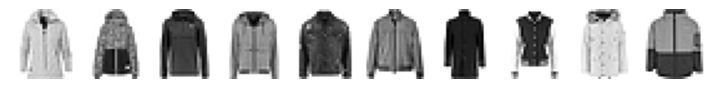

In [14]:
plt.figure(figsize=(9,9))
X_4 = X_train[(y_train == 4)] #Coat
example_images = X_4[:10]
plot_items(example_images, images_per_row=10)

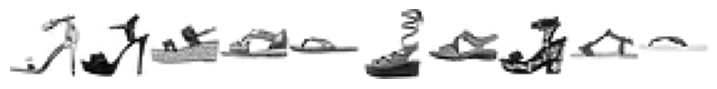

In [15]:
plt.figure(figsize=(9,9))
X_5 = X_train[(y_train == 5)] #Sandal
example_images = X_5[:10]
plot_items(example_images, images_per_row=10)

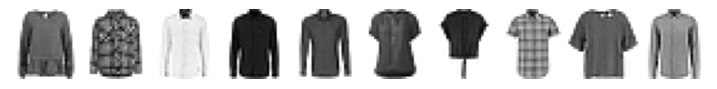

In [16]:
plt.figure(figsize=(9,9))
X_6 = X_train[(y_train == 6)] #shirt
example_images = X_6[:10]
plot_items(example_images, images_per_row=10)

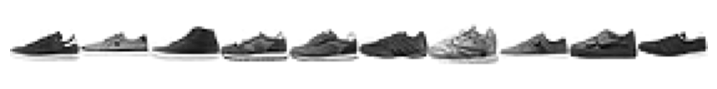

In [17]:
plt.figure(figsize=(9,9))
X_7 = X_train[(y_train == 7)] #sneaker
example_images = X_7[:10]
plot_items(example_images, images_per_row=10)

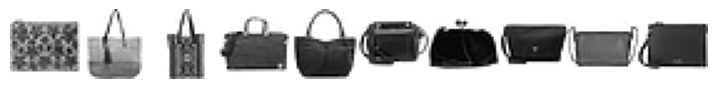

In [18]:
plt.figure(figsize=(9,9))
X_8 = X_train[(y_train == 8)] #bag
example_images = X_8[:10]
plot_items(example_images, images_per_row=10)

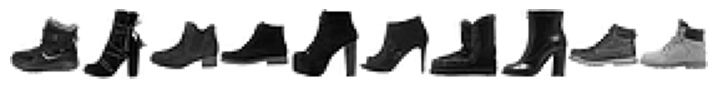

In [19]:
plt.figure(figsize=(9,9))
X_9 = X_train[(y_train == 9)] #ankle boots
example_images = X_9[:10]
plot_items(example_images, images_per_row=10)

### Binary classifier (shirt or not shirt)

Write code to create y labels for a binary classifier to distinguish shirt or not-shirt. (10 points)



In [20]:
# fill in code

y_train_shirt = (y_train == 6)
y_test_shirt = (y_test == 6)



In [21]:
y_train_shirt.shape

(60000,)

In [22]:
y_test_shirt.shape

(10000,)

Train a binary classifier using SGDClassifier. (10 points)

Use max_iter=1000, tol=1e-3, random_state=42.


In [23]:
from sklearn.linear_model import SGDClassifier

#fill in code
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_shirt)

SGDClassifier(random_state=42)

Predict whether some_item is a shirt. (5 points)

In [24]:
# fill in code
sgd_clf.predict([some_item])

array([False])

Follow the text to obtain the accuracy using cross validation. (10 points)

Use 3-fold cross validation.

In [25]:
from sklearn.model_selection import cross_val_score
# fill in code
cross_val_score(sgd_clf, X_train, y_train_shirt, cv=3, scoring="accuracy")

array([0.88805, 0.794  , 0.91905])



Use cross validtion to conduct predictions on the training set. (10 points)



In [26]:
from sklearn.model_selection import cross_val_predict
# fill in code
y_train_pred = cross_val_predict(estimator=sgd_clf, X=X_train, y=y_train_shirt,cv=3)

Obtain the confusion matrix. (10 points)

In [27]:
from sklearn.metrics import confusion_matrix
# fill in code
confusion_matrix(y_true=y_train_shirt, y_pred=y_train_pred)

array([[47957,  6043],
       [ 1935,  4065]])

####Calculate precision, recall and F1 score by passing in the ground truth and the prediction.

Calculate precision. (5 points)

In [28]:
from sklearn.metrics import precision_score, recall_score
# fill in code

precision_score(y_true=y_train_shirt, y_pred=y_train_pred)

0.40215670755836963

Calculate recall. (5 points)

In [29]:
# fill in code
recall_score(y_true=y_train_shirt, y_pred=y_train_pred)

0.6775

Calculate F1 score. (5 points)

In [30]:
from sklearn.metrics import f1_score
# fill in code
f1_score(y_train_shirt, y_train_pred)

0.504718152470822

Get decision scores.

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_shirt, cv=3, n_jobs=-1,
                             method="decision_function")

Compute precision and recall for all posssible threshold.

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_shirt, y_scores)

## Impact of threshold

Follow the text to plot the precision and recall versus the decision threshold. (5 points)

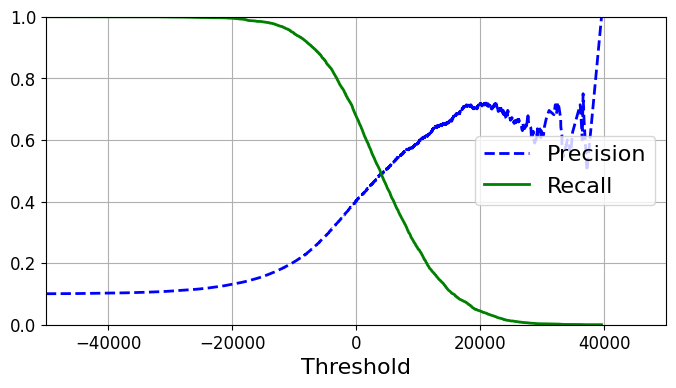

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
# fill in code
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_true=y_train_shirt, probas_pred=y_scores)

plot_precision_recall_vs_threshold(precision, recall, thresholds)

plt.show()

## Precision and Recall Curve

Plot the precsion versus recall. (5 points)

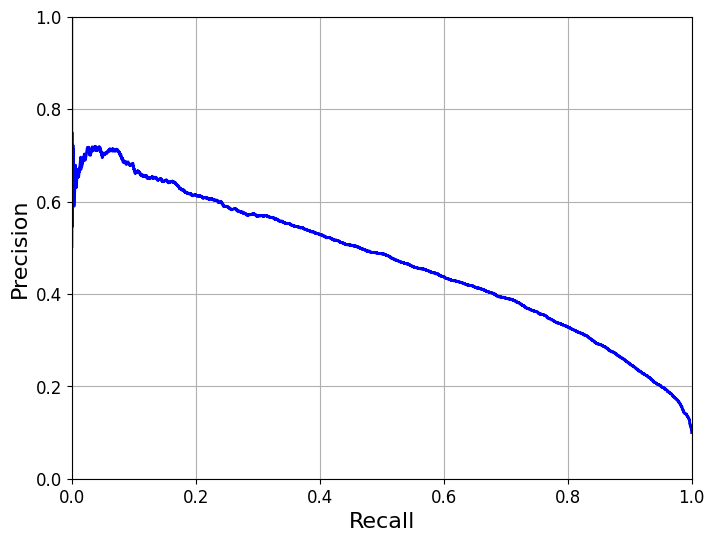

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
# fill in code
plot_precision_vs_recall(precision, recall)

plt.show()

## ROC curve

Plot the ROC curve. (5 points)

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_shirt, y_scores)

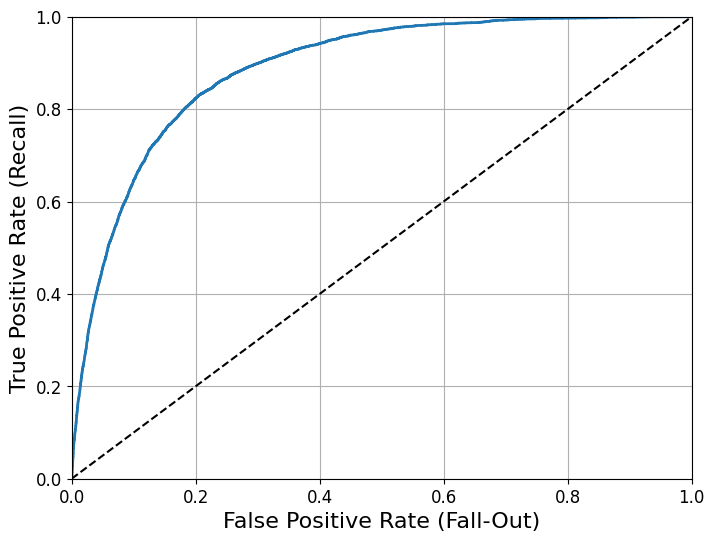

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
# fill in code
plot_roc_curve(fpr, tpr, label='SGD')

plt.show()

Calculate ROC AUC score.

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_shirt, y_scores)

0.8873327407407408

### Random Forest Binary Classifier

Train a random forest classifer.

Plot the ROC curves for SDD classifier and the random forest classifer.

Calculate the roc_auc_score for the random forest classifier.

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_shirt, cv=3, n_jobs=-1,
                                    method="predict_proba")

In [40]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_shirt,y_scores_forest)

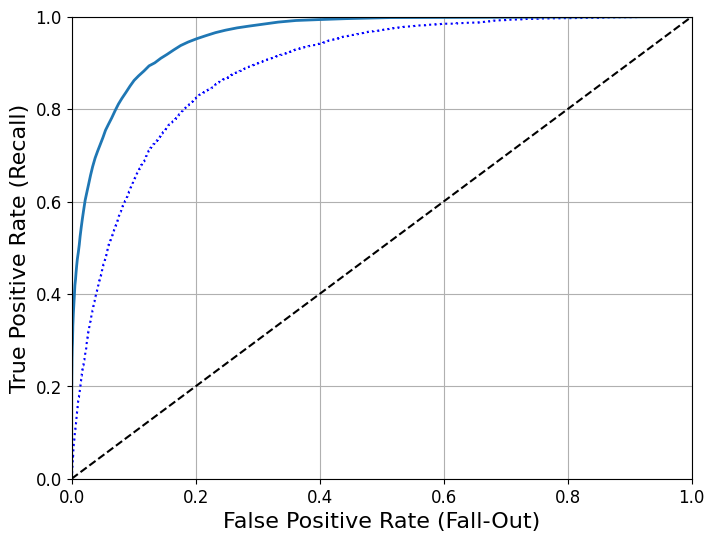

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()

In [42]:
roc_auc_score(y_train_shirt, y_scores_forest)

0.956154913580247

Note the random forest classifier has better ROC AUC score.

### Multiclass Classification

Use SGD classifer for multiclass classification and conduct error analysis. Explore misclassifications between T-shirts and shirts.

Find a better classifier and make sure the accuracy is above 85% using trainning data and test the classifer on the test data.

First, we scale the data.

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [49]:
from sklearn.linear_model import SGDClassifier

# fill in code use tol=1e-3, random_state=42
sgd_clf = SGDClassifier(tol=1e-3, random_state=42)

# only use the first 1000 training sample to save time
sgd_clf.fit(X_train_scaled[:1000], y_train[:1000])
sgd_clf.predict([some_item])

array([8], dtype=uint8)

In [50]:
print(y_train[36001])

8


Make predictions and obtain confustion matrix.

In [51]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4777,   19,   88,  448,   26,    1,  550,    0,   91,    0],
       [  14, 5685,   38,  199,   15,    1,   45,    0,    3,    0],
       [  42,    5, 4367,   90,  772,    0,  663,    0,   61,    0],
       [ 212,  105,   76, 5205,  191,    0,  199,    0,   12,    0],
       [   8,    5,  617,  330, 4449,    0,  568,    0,   23,    0],
       [   4,    2,    3,   11,    2, 5489,   18,  277,   72,  122],
       [ 806,   18,  635,  372,  550,    0, 3441,    1,  176,    1],
       [   0,    0,    0,    0,    0,  319,    0, 5422,   16,  243],
       [  31,    3,   28,  121,   33,   11,  138,   35, 5595,    5],
       [   0,    0,    0,    6,    1,  100,    7,  251,    4, 5631]])

In [177]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

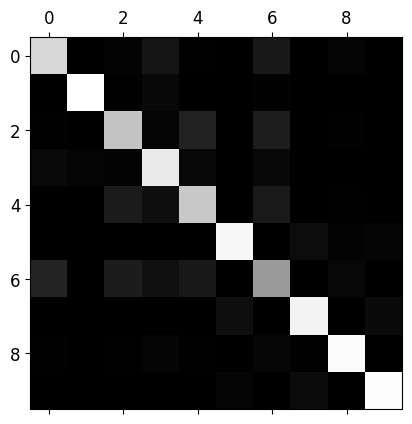

In [178]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [179]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

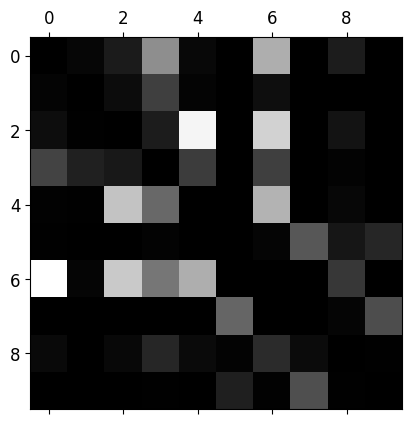

In [180]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Explore misclassifications between T-shirts and shirts. (5 points)

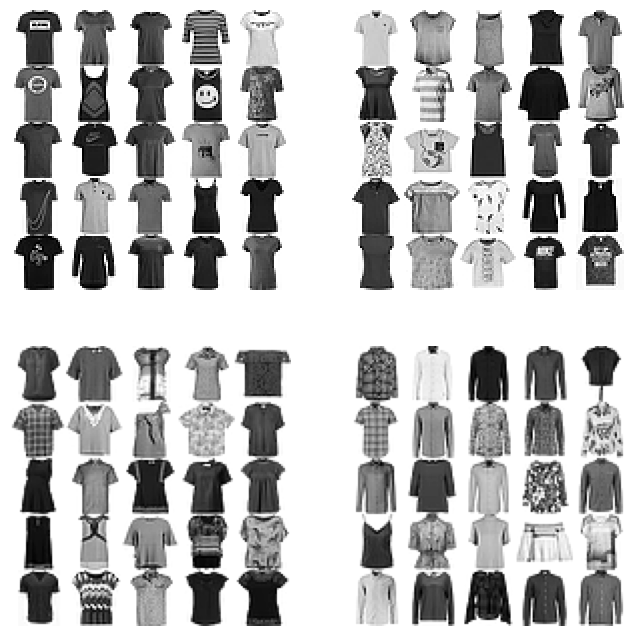

In [181]:
# fill in code
cl_a, cl_b = 0, 6
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_items(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_items(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_items(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_items(X_bb[:25], images_per_row=5)
plt.show()

In [182]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [183]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, n_jobs=-1, scoring="accuracy")

array([0.8776, 0.8825, 0.8805])

In [192]:
forest_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [184]:
# num = 0

# for i in y_test:

#   if i == 0:
#     num=num+1

# print(num)


Apply scale transform on X_test and make predictions on the test set. (10 points)

In [210]:
# fill in code
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
y_predict_test = forest_clf.predict(X=X_test_scaled)

Calculate the test accuracy.

In [208]:
accuarcy =  np.sum(y_predict_test == y_test) / len(y_test)
print(accuarcy)

0.8755


Indeed, we beat 85% of accuracy.